# PCA+K-means


In [1]:
import pandas as pd
import numpy as np
data_feature = pd.read_csv('../Data/features.csv')


In [2]:
data_feature.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,105,745.278374,19,38,26,22,57,25.552401,31.197699,17.231445,1.388890,0.548246,1.388890,0.630342,0.534947
1,183,609.722710,85,37,35,26,42,11.994545,22.397977,12.930285,4.444448,0.668169,1.944446,0.603175,0.536427
2,186,404.166990,141,18,9,18,40,7.822587,32.333359,14.435531,3.611114,0.617284,2.222224,0.833334,0.385836
3,97,313.055806,49,26,16,6,43,11.618566,23.479185,13.684270,4.444448,0.779915,2.222224,1.041667,0.773695
4,113,68.055610,97,4,5,7,17,2.168143,15.312512,5.404863,4.166670,1.388890,0.555556,0.388889,0.414367


In [3]:
np_data = data_feature.values

In [4]:
np_data

array([[1.05000000e+02, 7.45278374e+02, 1.90000000e+01, ...,
        1.38889000e+00, 6.30342385e-01, 5.34947196e-01],
       [1.83000000e+02, 6.09722710e+02, 8.50000000e+01, ...,
        1.94444600e+00, 6.03175086e-01, 5.36426773e-01],
       [1.86000000e+02, 4.04166990e+02, 1.41000000e+02, ...,
        2.22222400e+00, 8.33334000e-01, 3.85836324e-01],
       ...,
       [2.50000000e+02, 5.75000460e+02, 1.36000000e+02, ...,
        1.11111200e+00, 4.23976947e-01, 1.81603803e-01],
       [1.95000000e+02, 6.02222704e+02, 1.17000000e+02, ...,
        1.38889000e+00, 6.77083875e-01, 3.63775285e-01],
       [7.38000000e+02, 1.05064460e+04, 5.10000000e+01, ...,
        1.50767121e+01, 4.83671928e-01, 6.50210370e-01]])

In [5]:
def NormalizedStd(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    return (data - data_mean) / data_std
np_data = NormalizedStd(np_data)

In [6]:
np_data

array([[-4.29009892e-01, -1.80800110e-01, -6.31137352e-01, ...,
        -4.52051200e-02, -5.86306433e-02, -4.01335711e-02],
       [-5.94076004e-02, -2.05517133e-01,  3.65284706e-01, ...,
        -3.86496373e-02, -8.99769374e-02, -3.99202905e-02],
       [-4.51921276e-02, -2.42997865e-01,  1.21073373e+00, ...,
        -3.53718960e-02,  1.75586047e-01, -6.16278644e-02],
       ...,
       [ 2.58071291e-01, -2.11848338e-01,  1.13524721e+00, ...,
        -4.84828613e-02, -2.96740134e-01, -9.10679291e-02],
       [-2.54570940e-03, -2.06884673e-01,  8.48398431e-01, ...,
        -4.52051200e-02, -4.69916875e-03, -6.48079575e-02],
       [ 2.57045486e+00,  1.59903706e+00, -1.48023627e-01, ...,
         1.16309255e-01, -2.27862604e-01, -2.35184147e-02]])

## PCA 降维

In [7]:

from sklearn.decomposition import PCA

#保留多少个维度
pca = PCA(n_components=4)
np_data_3d = pca.fit(np_data)

#返回所保留的n个成分各自的方差百分比
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

data_new_3d = pca.transform(np_data)

print(data_new_3d.shape)



[0.59858235 0.27856848 0.07460846 0.02038413]
[8.9897117  4.18363539 1.12049498 0.30613573]
(819, 4)


In [8]:
from sklearn.cluster import KMeans

## k-means++ 
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(data_new_3d)

# plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# plt.show()


In [9]:
def draw_Point_Cloud(Points, Lables, axis = True, **kags):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D 
    x_axis = Points[:,0]
    y_axis = Points[:,1]
    z_axis = Points[:,2]
    fig = plt.figure() 
    ax = Axes3D(fig) 

    ax.scatter(x_axis, y_axis, z_axis, c = Lables)
    # 设置坐标轴显示以及旋转角度
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10,azim=235)
    if not axis:
        #关闭显示坐标轴
        plt.axis('off')
    
    plt.show()

用普通的PCA降维，可以看出点与点之间没有明显地区分开来，数据在降维后的空间中，还是线性不可分的。


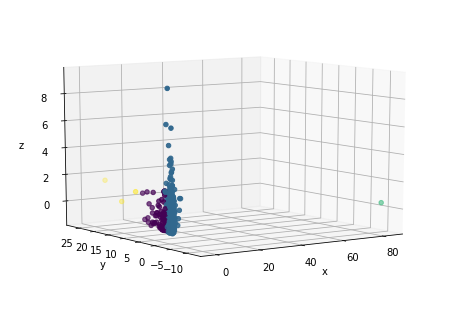

In [10]:
draw_Point_Cloud(data_new_3d, y_pred)

## 核方法 核PCA
运行[文件](PCA-Kmeans.py)可以查看可交互结果。

原理分析https://zhuanlan.zhihu.com/p/59775730

In [11]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
#未测试 https://blog.csdn.net/ChenVast/article/details/79236160
def rbf_kernel_pca(X, gamma, n_components):
    """
    RBF kernel PCA 实现.
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_samples, n_features]
        
    gamma: float
      RBF核的调优参数
        
    n_components: int
      要返回的主要组件的数量
    Returns
    ------------
     X_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset   
    """
    # 计算成对的欧几里得距离。
    #在MxN维数据集中
    sq_dists = pdist(X, 'sqeuclidean')
 
    # 将成对距离转换成方阵。
    mat_sq_dists = squareform(sq_dists)
 
    # 计算对称核矩阵。
    K = exp(-gamma * mat_sq_dists)
 
    # 中心核矩阵.
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
 
    # 从中心核矩阵得到特征对。
    # numpy.eigh 按顺序返回它们
    eigvals, eigvecs = eigh(K)
 
    #收集顶级k特征向量(投影样本)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))
 
    return X_pc

(819, 6)


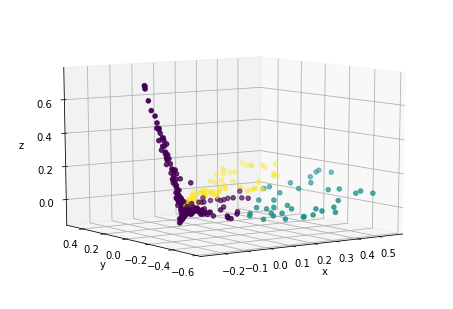

In [12]:
from sklearn.cluster import DBSCAN

from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=6,kernel='rbf',gamma=15)
np_data_3d = pca.fit(np_data)



data_new_3d = pca.transform(np_data)

#显示处理后数据大小
print(data_new_3d.shape)

## k-means++ 
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(data_new_3d)
draw_Point_Cloud(data_new_3d, y_pred)

In [13]:
type(data_new_3d)

numpy.ndarray

In [16]:
import h5py
with h5py.File('..\Data\\3d_scatter_data.h5','w') as f:
    f.create_dataset('data', data = data_new_3d)
    f.create_dataset('label', data = y_pred)
